In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [143]:
from ipywidgets import Dropdown

In [144]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [145]:
fname = "opendata3.csv"
od = open(fname, "r")
data = csv.DictReader(od)
data.fieldnames[0] = "name"  
df = pd.DataFrame(data)
od.close()

In [146]:
df["value"] = pd.to_numeric(df["value"])

In [147]:
names = list(set(df["name"]))
regions = list(set(df["region"]))

In [165]:
param = []
dd_values = Dropdown(
    options=names,
    value='Средняя пенсия', # Выбор по умолчанию
    description='Параметр:' 
)

def on_button_clicked(b):
    param.append(b['new'])
    print(param)

dd_values.observe(on_button_clicked, names='value')
display(dd_values)

Dropdown(description='Параметр:', options=('Средняя пенсия', 'Средние траты в ресторане фастфуд', 'Средний чек…

['Количество новых депозитов']


In [166]:
dd_regions = Dropdown(
    options=regions,
    value='Россия', # Выбор по умолчанию
    description='Регион:' 
)

def on_button_clicked(b):
    param.append(b['new'])
    print(param)

dd_regions.observe(on_button_clicked, names='value')
display(dd_regions)

Dropdown(description='Регион:', index=44, options=('Кировская область', 'Ханты-Мансийский автономный округ — Ю…

['Количество новых депозитов', 'Свердловская область']


In [168]:
df1 = df[(df["name"] ==  param[0]) & (df["region"] == param[1])][["date" ,"value"]]
df1.set_index('date', inplace=True)
dt_start = datetime.strftime((datetime.strptime(df1.index[0], "%Y-%m-%d") + relativedelta(months=-1)), "%Y-%m-%d")
index = pd.date_range(dt_start, df1.index[-1], freq='M', closed=None).shift(15, freq="D")
s = pd.Series(df1["value"], index=index)

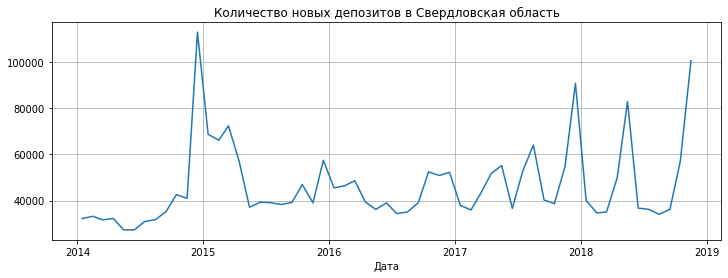

In [169]:
plt.figure(figsize=(12,4))
plt.title(f"{param[0]} в {param[1]}")
plt.xlabel("Дата")
plt.grid(True)
plt.plot(s)